In [ ]:
!pip install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [10]:
#restart

In [2]:
import collections

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
from konlpy.tag import Mecab

In [3]:
PATH = '/content/drive/MyDrive/gh/klue/DATA'

## CoLA [문장 문법성 판단]
CoLA(The Corpus of Linguistic Acceptability, 문법성 수용도 말뭉치)

https://ichi.pro/ko/part-2-cola-copus-of-linguistic-acceptability-deiteo-seteuui-tegseuteu-bunlyuleul-wihan-pytorchleul-sayonghan-bert-m-26411849167073

In [4]:
CoLA_train = pd.read_csv(PATH + '/CoLA/NIKL_CoLA_train.tsv',sep='\t')
CoLA_dev = pd.read_csv(PATH + '/CoLA/NIKL_CoLA_dev.tsv',sep='\t')
CoLA_test = pd.read_csv(PATH + '/CoLA/NIKL_CoLA_test.tsv',sep='\t')

In [56]:
CoLA_train.head()

,source,acceptability_label,source_annotation,sentence
0,T00001,1,NaN,높은 달이 떴다.
1,T00001,0,*,달이 뜸이 높았다.
2,T00002,1,NaN,실없는 사람이 까불까불한다.
3,T00003,1,NaN,나는 철수에게 공을 던졌다.
4,T00004,1,NaN,내가 순이와 둘이서 다툰다.


In [18]:
print(len(CoLA_train),len(CoLA_dev),len(CoLA_test))

15876 2032 1060


In [51]:
print(CoLA_train.isnull().sum(),'\n')
print(CoLA_dev.isnull().sum(),'\n')
print(CoLA_test.isnull().sum(),'\n')

source                    0
acceptability_label       0
source_annotation      7912
sentence                  0
dtype: int64 

source                    0
acceptability_label       0
source_annotation      1070
sentence                  0
dtype: int64 

index       0
sentence    0
dtype: int64 



In [50]:
print(CoLA_train['acceptability_label'].value_counts(),'\n')
print(CoLA_dev['acceptability_label'].value_counts(),'\n')

0    7964
1    7912
Name: acceptability_label, dtype: int64 

1    1071
0     961
Name: acceptability_label, dtype: int64 



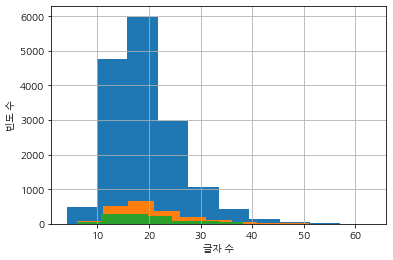

In [24]:
# 글자 수
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    ax = here['sentence'].str.len().hist() 
    ax.set_xlabel('글자 수') 
    ax.set_ylabel('빈도 수')

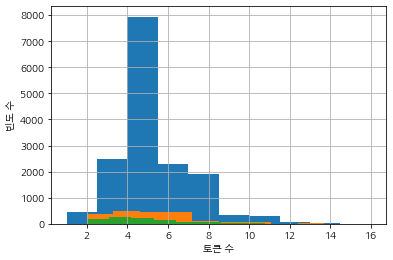

In [25]:
# 토큰
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    ax = here['sentence'].str.split().map(lambda x: len(x)).hist() 
    ax.set_xlabel('토큰 수')
    ax.set_ylabel('빈도 수')

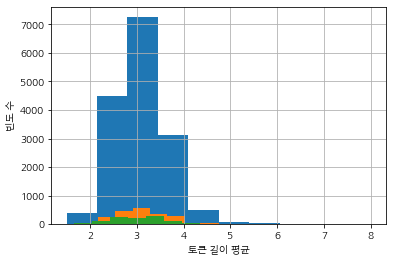

In [26]:
# 토큰 길이 평균
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    ax = here['sentence'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    ax.set_xlabel('토큰 길이 평균')
    ax.set_ylabel('빈도 수')

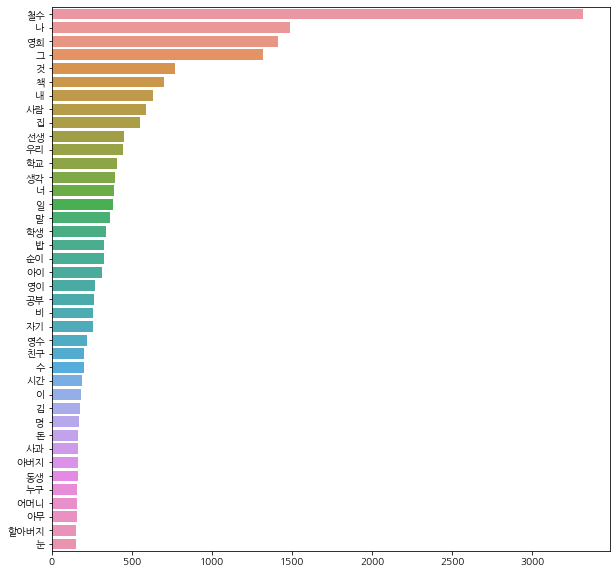

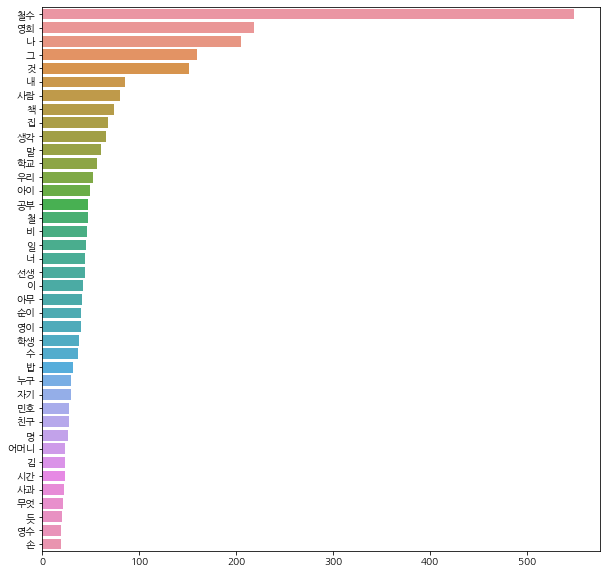

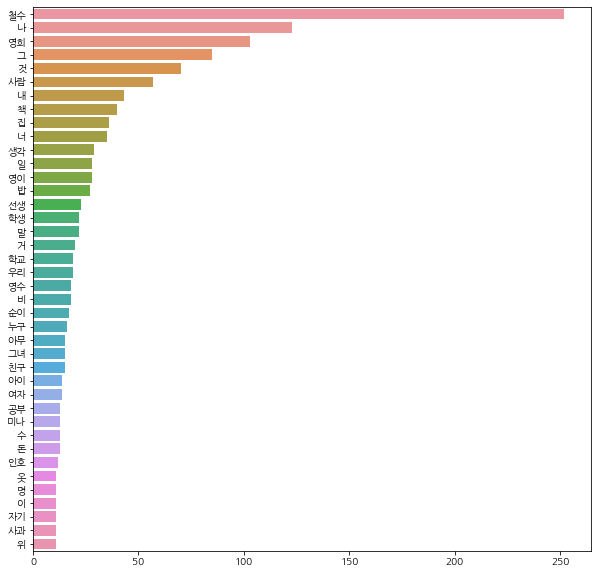

In [27]:
m = Mecab()
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    titles = here['sentence'].to_list()
    n_corpus = []
    for t in titles:
        n_corpus += m.nouns(t)

    count = collections.Counter(n_corpus)
    most = count.most_common()

    x,y = [], []
    for word,count in most[:40]:
        x.append(word)
        y.append(count)

    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

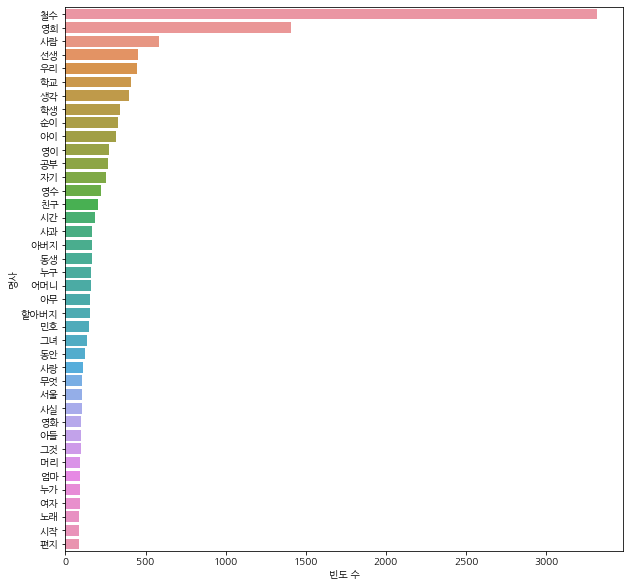

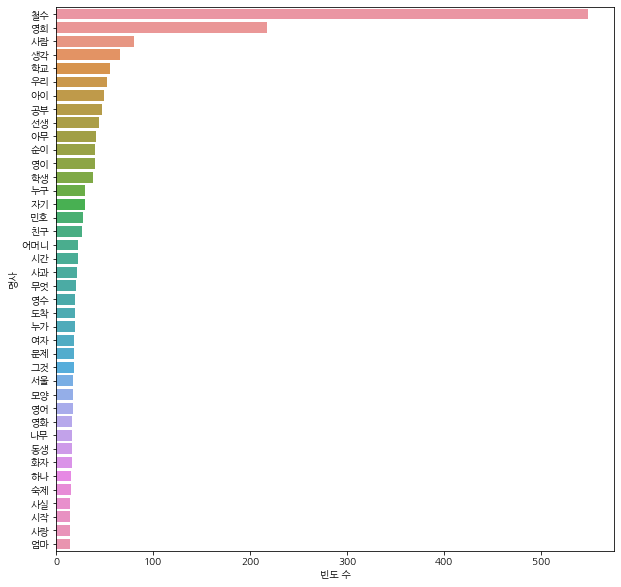

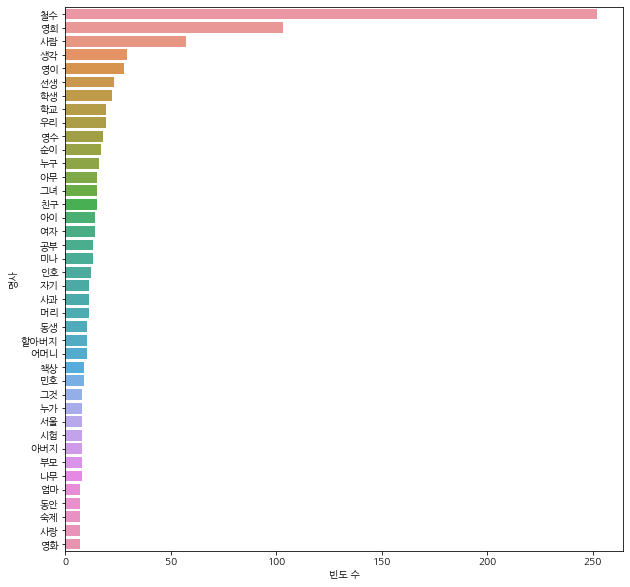

In [28]:
#2글자 이상의 명사 
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    titles = here['sentence'].to_list()
    n_corpus2 = [] 
    for t in titles: 
        for n in m.nouns(t): 
            if len(n)>1: 
                n_corpus2.append(n) 
            
    count = collections.Counter(n_corpus2) 
    most = count.most_common() #빈도 수 순으로 추출 
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count) 
        
    plt.rcParams['font.family'] = 'NanumGothic' 
    plt.figure(figsize=(10,10)) 
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '명사')

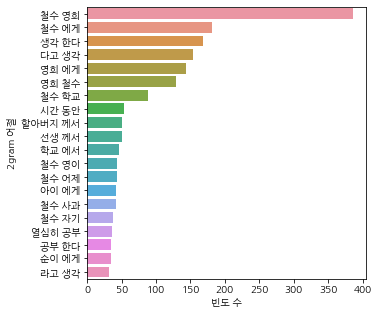

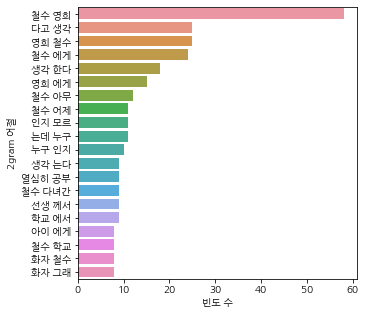

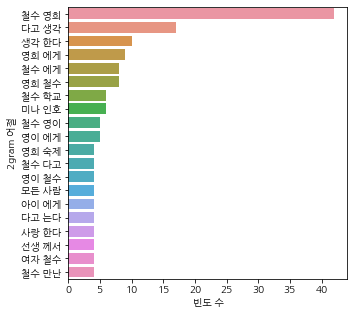

In [47]:
from sklearn.feature_extraction.text import CountVectorizer 

for here in [CoLA_train,CoLA_dev,CoLA_test]:
    titles = here['sentence'].to_list()
    m_corpus = []

    for t in titles:
        m_corpus.append(' '.join(m.morphs(t)))
    
    top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(5,5))  
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')

def get_top_ngram(corpus, n=None): 
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:20]

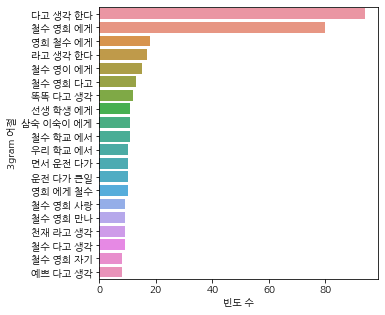

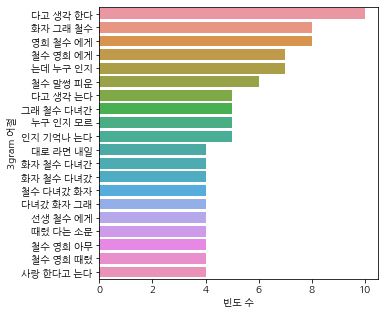

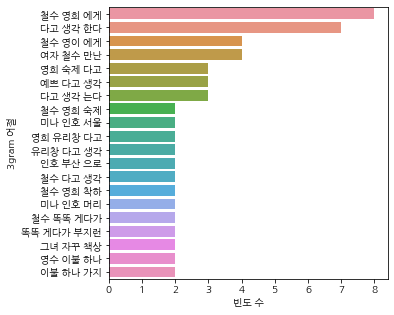

In [48]:
for here in [CoLA_train,CoLA_dev,CoLA_test]:
    titles = here['sentence'].to_list()
    m_corpus = []

    for t in titles:
        m_corpus.append(' '.join(m.morphs(t)))
    
    top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(5,5))  
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '3gram 어절')

## COPA [인과 관계 추론]
Choice of Plausible Alternatives

In [55]:
COPA_train = pd.read_csv(PATH + '/COPA/SKT_COPA_Train.tsv',sep='\t')
COPA_dev = pd.read_csv(PATH + '/COPA/SKT_COPA_Dev.tsv',sep='\t')
COPA_test = pd.read_csv(PATH + '/COPA/SKT_COPA_Test.tsv',sep='\t')

In [71]:
COPA_train.head()

,ID,sentence,question,1,2,Answer
0,1,이퀄라이저로 저음 음역대 소리 크기를 키웠다.,결과,베이스 소리가 잘 들리게 되었다.,베이스 소리가 들리지 않게 되었다.,1
1,2,음료에 초콜렛 시럽을 넣었다.,결과,음료수가 더 달아졌다.,음료수가 차가워졌다.,1
2,3,남자는 휴대폰을 호수에 빠뜨렸다.,결과,휴대폰이 업그레이드 되었다.,휴대폰이 고장났다.,2
3,4,옆 집 사람이 이사를 나갔다.,원인,옆 집 사람은 계약이 완료되었다.,옆 집 사람은 계약을 연장했다.,1
4,5,문을 밀었다.,결과,문이 잠겼다.,문이 열렸다.,2


In [60]:
print(len(COPA_train),len(COPA_dev),len(COPA_test))

3080 500 500


In [61]:
print(COPA_train.isnull().sum(),'\n')
print(COPA_dev.isnull().sum(),'\n')
print(COPA_test.isnull().sum(),'\n')

ID          0
sentence    0
question    0
1           0
2           0
Answer      0
dtype: int64 

ID          0
sentence    0
question    0
1           0
2           0
Answer      0
dtype: int64 

ID            0
sentence      0
question      0
1             0
2             0
Answer      500
dtype: int64 



In [62]:
print(COPA_train['Answer'].value_counts(),'\n')
print(COPA_dev['Answer'].value_counts(),'\n')

1    1666
2    1414
Name: Answer, dtype: int64 

2    250
1    250
Name: Answer, dtype: int64 



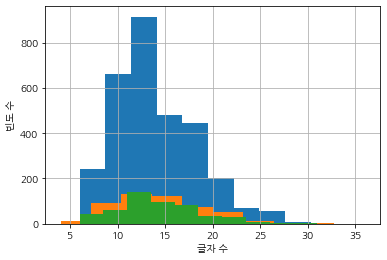

In [63]:
# 글자 수
for here in [COPA_train,COPA_dev,COPA_test]:
    ax = here['sentence'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

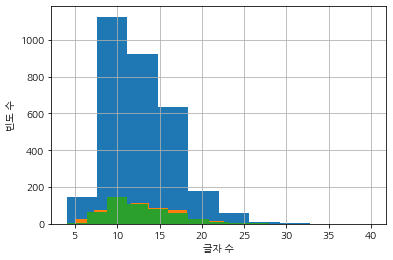

In [64]:
for here in [COPA_train,COPA_dev,COPA_test]:
    ax = here['1'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

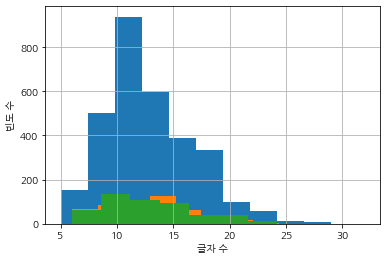

In [65]:
for here in [COPA_train,COPA_dev,COPA_test]:
    ax = here['2'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

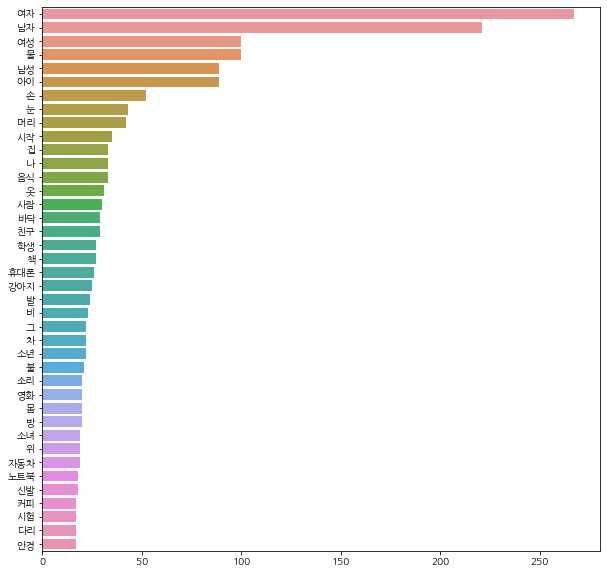

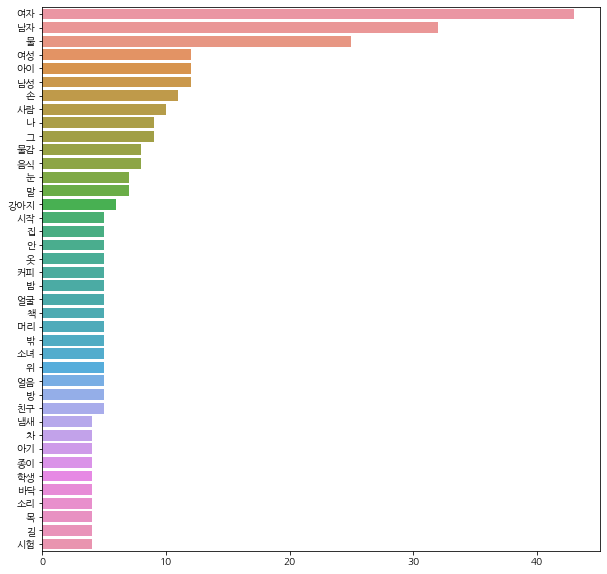

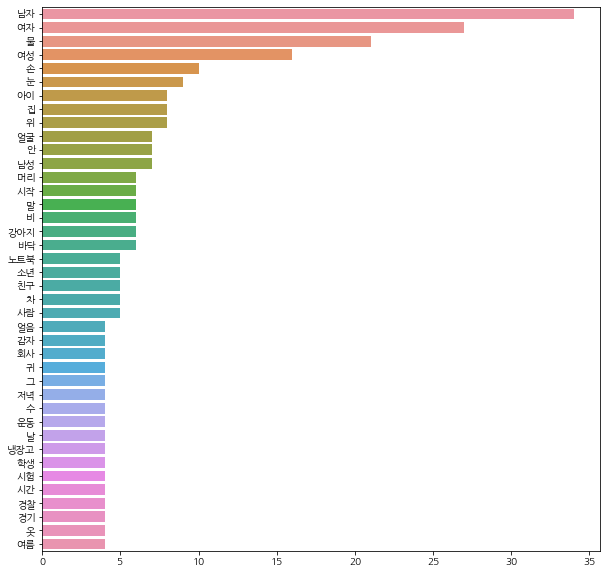

In [66]:
m = Mecab()
for here in [COPA_train,COPA_dev,COPA_test]:
    titles = here['sentence'].to_list()
    n_corpus = []
    for t in titles:
        n_corpus += m.nouns(t)

    count = collections.Counter(n_corpus)
    most = count.most_common()

    x,y = [], []
    for word,count in most[:40]:
        x.append(word)
        y.append(count)

    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

COPA (Choice Of Plausible Alternatives)

정답이 아닌 선택지도 질문과 연관성이 높다.

새로 산 **바지**의 **사이즈**가 너무 **크다** - 2

1. 더 **큰** **사이즈**의 **바지**로 교환했다.
2. 더 작은 **사이즈**의 **바지**로 교환했다.

두 단어간의 인과관계를 비교하는 방법을 사용하여 더 강한 causal strength 가 나타나는 선택지를 선택하는 방법으로 접근하면 좋을것같다.

하늘에 **먹구름**이 끼었다.

여자는 양산을 펼쳤다.

여자는 집에 **우산**을 가지러 갔다.

→ 원인 결과가 없어도 추론 가능

→ 먹구름 , 양산, 우산 

먹구름 - 양산

먹구름 - 우산  causal strength 더 높음

[https://www.cs.sjtu.edu.cn/~kzhu/papers/kzhu-copa.pdf](https://www.cs.sjtu.edu.cn/~kzhu/papers/kzhu-copa.pdf)

원인 인지 결과인지도 중요하다.

손톱을 깎았다. -1

1. 손톱이 길어졌다.
2. 손톱이 짧아졌다.

손톱이 길어져서 손톱을 깎았다.

손톱을 깎아서 손톱이 짧아졌다.

여자는 심호흡을 했다. -2	

1. 여자가 긴장했다.	
2. 여자의 긴장이 풀렸다.

여자가 긴장을 해서 심호흡을 했다.

여자는 심호흡을 해서 긴장이 풀렸다.

원인, 결과 를 알지 못하면 알수 없을것같다.

## BoolQ [판정 의문문]

https://ichi.pro/ko/dib-leoning-eun-geoui-modeun-dab-eul-gajigo-issseubnida-ye-anio-teulaenseupomeoleul-sayonghan-jilmun-eungdab-37640753054089

In [70]:
BoolQ_train = pd.read_csv(PATH + '/BoolQ/SKT_BoolQ_Train.tsv',sep='\t')
BoolQ_dev = pd.read_csv(PATH + '/BoolQ/SKT_BoolQ_Dev.tsv',sep='\t')
BoolQ_test = pd.read_csv(PATH + '/BoolQ/SKT_BoolQ_Test.tsv',sep='\t')

In [84]:
BoolQ_train.head(50)

,ID,Text,Question,"Answer(FALSE = 0, TRUE = 1)"
0,1,로마 시대의 오리엔트의 범위는 제국 내에 동부 지방은 물론 제국 외부에 있는 다른 ...,"오리엔트는 인도와 중국, 일본을 이루는 광범위한 지역을 지칭하는 단어로 쓰인다.",1
1,2,비글을 키우려면 비글이 뛰어놀수 있는 넓은 놀이공간 등을 확보하고 있는 단독주택이 ...,비글은 넓고 뚤린 공간에서 키워야 한다.,1
2,3,타이완 요리의 특징은 토속 요리(일본 통치 전)에서 기름을 많이 사용하는 다른 지역...,타이완 요리는 다른 지역의 중국 요리처럼 기름을 많이 사용하는 것이다.,0
3,4,연하곤란은 음식물이 구강에서 식도로 넘어가는 과정에 문제가 생겨 음식을 원활히 혹은...,연하곤란이 생기면 식도가 막히나요?,0
4,5,"인문과학 또는 인문학(人文學, 영어: humanities)은 인간과 인간의 근원문제...",인문과학은 경험적인 접근을 주로 사용하는가?,0
5,6,빌보드 핫 100(The Billboard Hot 100)은 《빌보드》에 매주 실리...,빌보드 핫 100(The Billboard Hot 100)은 메인차트인가?,1
6,7,1957년 프리댄은 그녀의 예전 스미스 대학교 동문에 대한 조사를 15주년 기념 동...,"프리댄은 대학 동문들이 주부로서의 생활에 만족하고 있음을 알고, 책을 쓰게 되었다.",0
7,8,사구체주머니 혹은 보우먼주머니(Bowman's capsule)는 모세혈관이 뭉친 덩...,세뇨관은 사구체를 감싸고 있는 두 겹 중 비교적 두꺼운 부분과 연결되어 있다.,1
8,9,박스오피스(box office) 또는 매표소는 영화나 공연을 관람할 수 있는 입장권...,박스오피스에서 영화 입장권을 판매하나요?,1
9,10,"3차원 프린터는 밀링 또는 절삭이 아닌, 기존 잉크젯 프린터에서 쓰이는 것과 유사한...",3차원 프린터는 적층 방식으로 입체물을 제작한다.,1


In [72]:
print(len(BoolQ_train),len(BoolQ_dev),len(BoolQ_test))

3665 700 704


In [75]:
print(BoolQ_train.isnull().sum(),'\n')
print(BoolQ_dev.isnull().sum(),'\n')
print(BoolQ_test.isnull().sum(),'\n')

ID                             0
Text                           0
Question                       0
Answer(FALSE = 0, TRUE = 1)    0
dtype: int64 

ID                             0
Text                           0
Question                       0
Answer(FALSE = 0, TRUE = 1)    0
dtype: int64 

ID                               0
Text                             0
Question                         0
Answer(FALSE = 0, TRUE = 1)    704
dtype: int64 



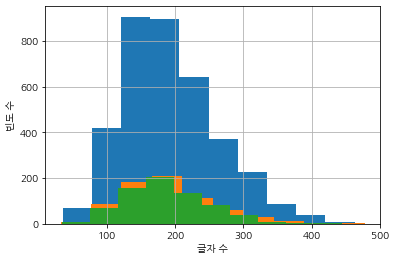

In [79]:
# 글자 수
for here in [BoolQ_train,BoolQ_dev,BoolQ_test]:
    ax = here['Text'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

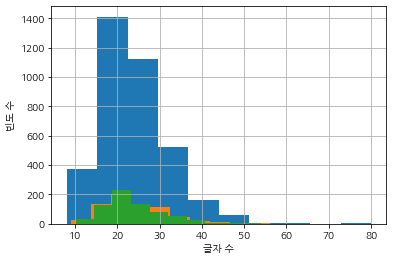

In [80]:
for here in [BoolQ_train,BoolQ_dev,BoolQ_test]:
    ax = here['Question'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

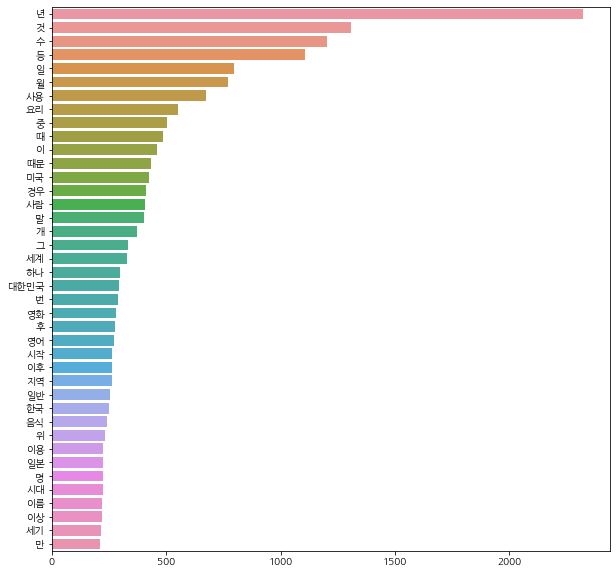

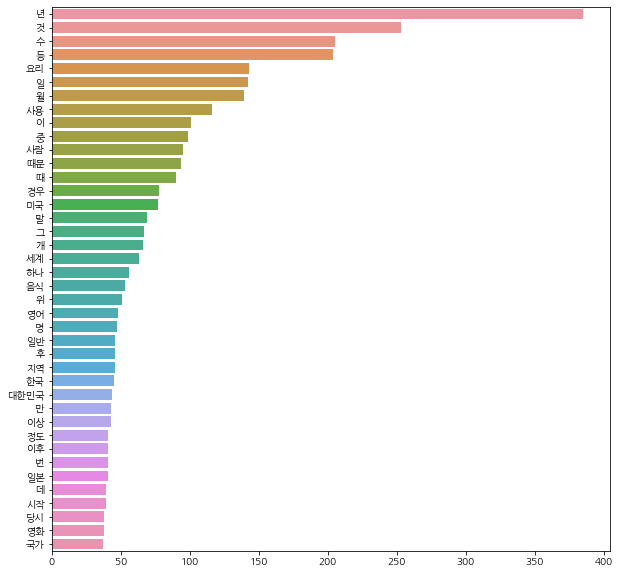

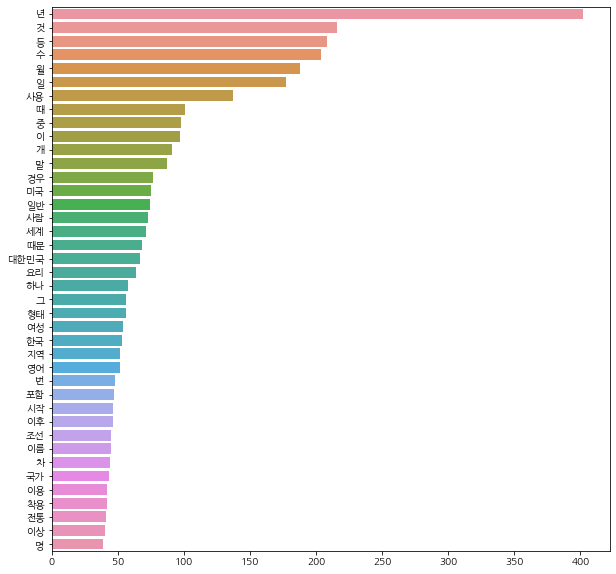

In [82]:
m = Mecab()
for here in [BoolQ_train,BoolQ_dev,BoolQ_test]:
    titles = here['Text'].to_list()
    n_corpus = []
    for t in titles:
        n_corpus += m.nouns(t)

    count = collections.Counter(n_corpus)
    most = count.most_common()

    x,y = [], []
    for word,count in most[:40]:
        x.append(word)
        y.append(count)

    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

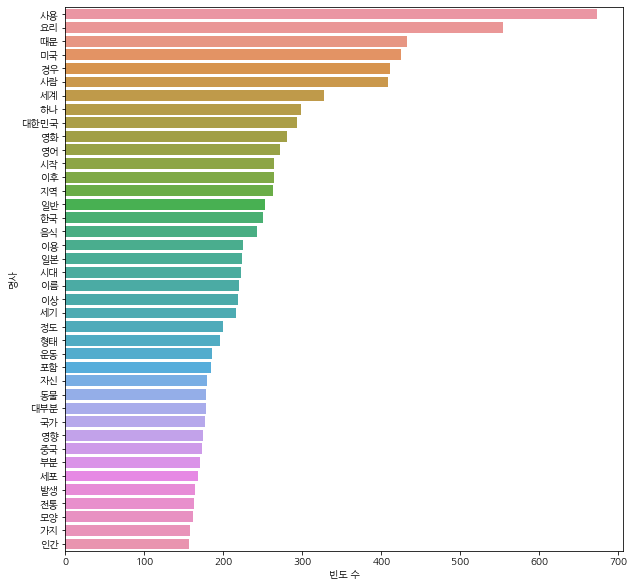

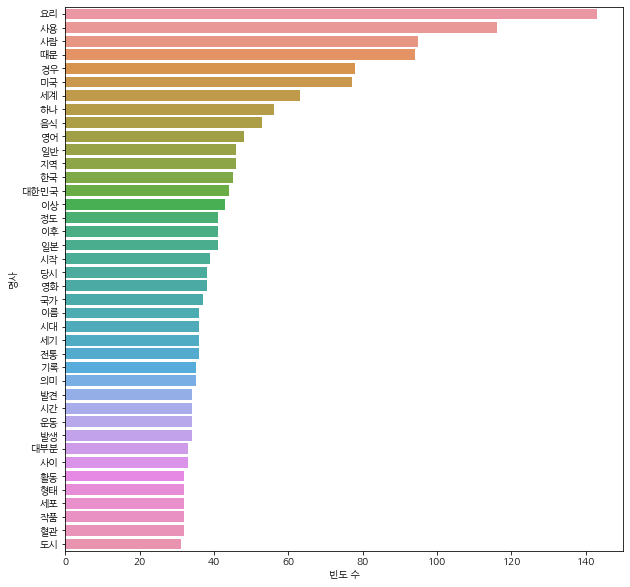

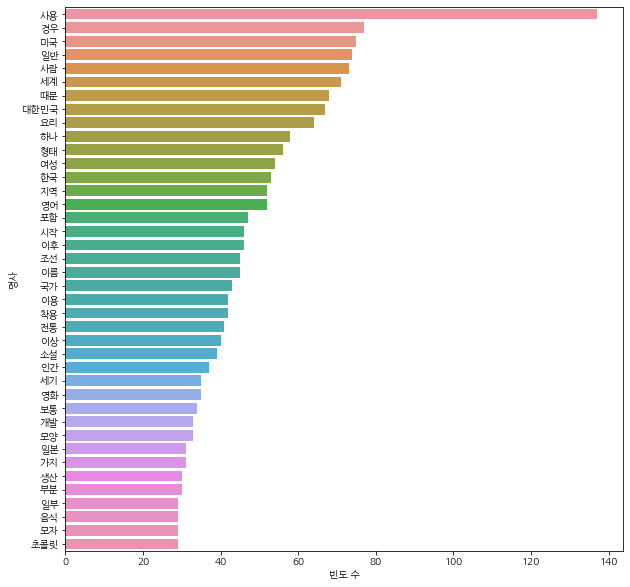

In [83]:
#2글자 이상의 명사 
for here in [BoolQ_train,BoolQ_dev,BoolQ_test]:
    titles = here['Text'].to_list()
    n_corpus2 = [] 
    for t in titles: 
        for n in m.nouns(t): 
            if len(n)>1: 
                n_corpus2.append(n) 
            
    count = collections.Counter(n_corpus2) 
    most = count.most_common()
    x, y= [], [] 
    for word,count in most[:40]: 
        x.append(word) 
        y.append(count) 
        
    plt.rcParams['font.family'] = 'NanumGothic' 
    plt.figure(figsize=(10,10)) 
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '명사')

BoolQ

케플러는 달을 망원경을 이용하여 독자적으로 관측, 《목성의 위성에 대한 해설》을 출판하여 갈릴레오의 이론에 힘을 보탰다. 그러나 갈릴레오는 《신천문학》에 대해 아무런 반응도 보이지 않았고, 케플러는 실망하였다. 당시 천문학자들은 목성의 위성들이 실제 존재하는 것이 아니라 망원경이 만들어낸 허상에 불과하다고 공격했다

《왕의 남자》(王의 男子)는 이준익 감독의 영화로 2005년 12월 29일 개봉하였다. 2006년 3월 5일 배급사 집계 기준으로, 《태극기 휘날리며》가 지니고 있던 대한민국 영화 흥행 기록(1174만 명)을 경신하였다.

《왕의 남자》는 2006년에 개봉하였는가?

《2게더: 더 시리즈》(태국어: เพราะเราคู่กัน 프로 라오 쿠 칸[*], 영어: 2gether: The Series)는 JittiRain의 소설 《우리가 함께 속해서》(태국어: เพราะเรา ... คู่กัน)을 원작으로하면서 2020년 2월 21일부터 2020년 5월 15일까지 방송된 태국의 드라마이다.

2021년 현재, 《2게더: 더 시리즈》는 방영중인가?

사용자 사전을 구축 할 경우 《 》 안에 있는 단어와,

() 앞에 있는 단어를 우선순위로 구축할 필요가 있다고 생각함.

양자역학(量子力學, 영어: quantum mechanics, quantum physics, quantum theory)은 분자, 원자, 전자, 소립자와 미시적인 계의 현상을 다루는 즉, 작은 크기를 갖는 계의 현상을 연구하는 물리학의 분야이다

() 안에 있는 내용은 앞 단어에 대한 영어명,한자,부연설명이기때문에 제거해도 될것같다.

In [ ]:
# https://huggingface.co/transformers/glossary.html#attention-mask

>>> sequence_a = "HuggingFace is based in NYC"
>>> sequence_b = "Where is HuggingFace based?"

'[CLS] HuggingFace is based in NYC [SEP] Where is HuggingFace based? [SEP]'

In [ ]:
# https://github.com/dingmingshuo/boolq-bert/blob/2be01764bcd2324863836192cfb9b3023de4ba23/data/dataset.py#L42
'''
def encode_data(tokenizer, questions, passages, max_length):
    input_ids = []
    attention_masks = []

    for question, passage in tqdm(zip(questions, passages)):
        encoded_data = tokenizer.encode_plus(
            question, passage, truncation=True, padding='max_length', max_length=max_length)
        encoded_pair = encoded_data["input_ids"]
        attention_mask = encoded_data["attention_mask"]

        input_ids.append(encoded_pair)
        attention_masks.append(attention_mask)

    return input_ids, attention_masks
'''

## WiC [동형이의어 구별]
Words in Context

In [86]:
WiC_train = pd.read_csv(PATH + '/WiC/NIKL_SKT_WiC_Train.tsv',sep='\t')
WiC_dev = pd.read_csv(PATH + '/WiC/NIKL_SKT_WiC_Dev.tsv',sep='\t')
WiC_test = pd.read_csv(PATH + '/WiC/NIKL_SKT_WiC_Test.tsv',sep='\t')

In [113]:
WiC_train.head(100)

,ID,Target,SENTENCE1,SENTENCE2,ANSWER,start_s1,end_s1,start_s2,end_s2
0,1,단정,그의 죽음은 타살로 단정이 되었다.,단정이 된 교실은 정돈되어 있다.,False,11,13,0,2
1,2,단수,현대 생활에서 단전과 단수의 고통은 겪어 보지 않으면 짐작도 못한다.,사업자를 단수로 할지 복수로 할지를 놓고 관계자들 사이에 입씨름이 벌어졌다.,False,12,14,5,7
2,3,화성,"화성은 밤과 낮, 하루의 길이와 계절의 변화가 지구와 매우 비슷하다.",화성은 서양 음악을 이루는 중요한 요소이다.,False,0,2,0,2
3,4,자전,달의 자전 주기는 달이 지구의 둘레를 공전하는 주기와 같다.,태양계의 모든 행성은 자전을 한다.,True,3,5,12,14
4,5,동지,오늘의 적이 내일은 동지가 될 수 있다.,동지에 무와 감자를 나누어 심었다.,False,11,13,0,2
...,...,...,...,...,...,...,...,...,...
95,96,정사,조정의 부패한 정사를 생각한다면 실로 통탄하기 짝이 없는 일이었다.,진정으로 나라를 걱정하며 정사를 논할 인물이 없구나.,True,8,10,14,16
96,97,지체,더 이상의 지체는 용납할 수 없습니다.,"저흰 지체가 낮으니, 부디 양반 나으리의 넓은 아량을 저희에게 보여주십시오.",False,6,8,3,5
97,98,원조,그의 원조로 어떻게든 버틸 수 있었다.,이 쭈꾸미 집이 전국에 있는 쭈꾸미집의 원조이다.,False,3,5,22,24
98,99,방,하룻밤 묵을 방을 잡다.,범인을 잡는 방을 붙이다.,False,7,8,7,8


In [114]:
print(len(WiC_train),len(WiC_dev),len(WiC_test))

7748 1166 1246


In [115]:
print(WiC_train.isnull().sum(),'\n')
print(WiC_dev.isnull().sum(),'\n')
print(WiC_test.isnull().sum(),'\n')

ID           0
Target       0
SENTENCE1    0
SENTENCE2    0
ANSWER       0
start_s1     0
end_s1       0
start_s2     0
end_s2       0
dtype: int64 

ID           0
Target       0
SENTENCE1    0
SENTENCE2    0
ANSWER       0
start_s1     0
end_s1       0
start_s2     0
end_s2       0
dtype: int64 

ID              0
Target          0
SENTENCE1       0
SENTENCE2       0
ANSWER       1246
start_s1        0
end_s1          0
start_s2        0
end_s2          0
dtype: int64 



In [89]:
WiC_train['Target'].value_counts()[:30]

맞     749
들     604
맡     318
보인    266
따라    196
쓰     171
묻     140
뛰     123
이르    117
보이    115
보여    111
타     104
따르     89
쉬      53
쓴      52
달      50
치      48
물      45
강한     43
말      43
차      42
지      39
걷      38
불리     36
가리     35
강하     32
갈      27
구하     27
달리     27
썼      26
Name: Target, dtype: int64

In [91]:
WiC_dev['Target'].value_counts()[:30]

맞     116
들      65
맡      39
보인     33
쓰      22
이르     19
따라     18
묻      16
쉬      11
뛰      11
달      10
쓴      10
보여     10
보이      9
불리      8
따르      8
강한      8
타       8
치       7
물리      7
밀려      6
깨       5
구하      5
감       5
강하      5
말       4
켜       4
지       4
든       3
탄       3
Name: Target, dtype: int64

In [93]:
WiC_test['Target'].value_counts()[:30]

맞     85
들     69
맡     40
보인    37
쓰     30
따라    23
이르    21
묻     18
따르    15
보여    15
뛰     11
쉬      9
타      8
물      8
달      7
보이     6
쓴      6
치      6
감      6
보였     6
갈      6
지      6
말      5
차      5
가리     5
불리     5
뜨      5
반해     4
든      4
부리     4
Name: Target, dtype: int64

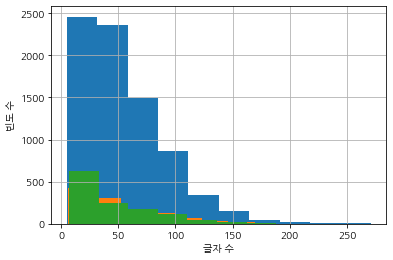

In [116]:
for here in [WiC_train,WiC_dev,WiC_test]:
    ax = here['SENTENCE1'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

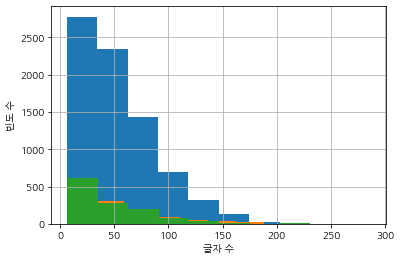

In [117]:
for here in [WiC_train,WiC_dev,WiC_test]:
    ax = here['SENTENCE2'].str.len().hist() 
    ax.set_xlabel('글자 수')
    ax.set_ylabel('빈도 수')

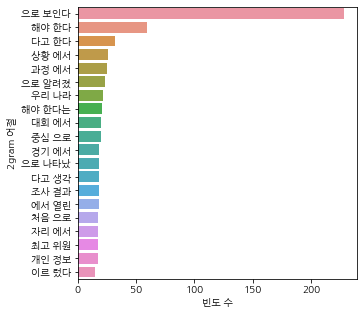

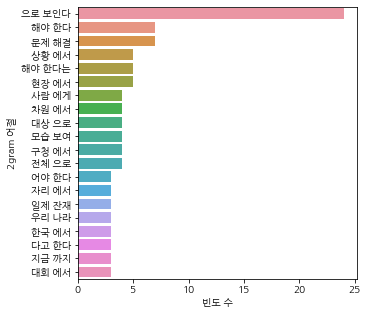

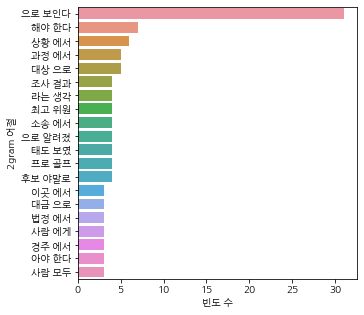

In [119]:
from sklearn.feature_extraction.text import CountVectorizer 

for here in [WiC_train,WiC_dev,WiC_test]:
    titles = here['SENTENCE1'].to_list()
    m_corpus = []

    for t in titles:
        m_corpus.append(' '.join(m.morphs(t)))
    
    top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(5,5))  
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')

def get_top_ngram(corpus, n=None): 
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

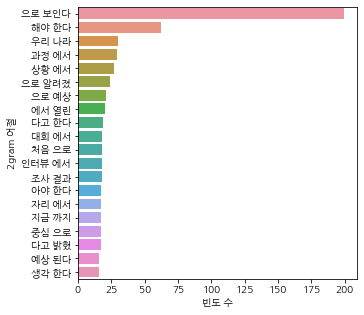

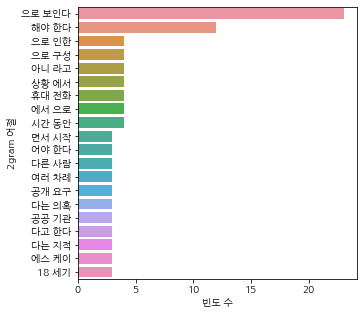

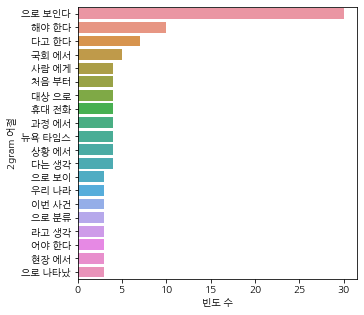

In [120]:
from sklearn.feature_extraction.text import CountVectorizer 

for here in [WiC_train,WiC_dev,WiC_test]:
    titles = here['SENTENCE2'].to_list()
    m_corpus = []

    for t in titles:
        m_corpus.append(' '.join(m.morphs(t)))
    
    top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(5,5))  
    ax = sns.barplot(x=y,y=x) 
    ax.set(xlabel = '빈도 수', ylabel = '2gram 어절')

def get_top_ngram(corpus, n=None): 
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
    return words_freq[:20]

In [105]:
s1=WiC_train['SENTENCE1'].to_list()
s2=WiC_train['SENTENCE2'].to_list()
tg=WiC_train['Target'].to_list()
AS=WiC_train['ANSWER'].to_list()

In [112]:
a,b,c = '','',''
for i in range(len(WiC_train)):
    for idx1, j in enumerate(m.pos(s1[i])):
        if j[0] == tg[i]:
            a = m.pos(s1[i])[idx1 - 1] + j + m.pos(s1[i])[idx1 + 1]
    for idx2, k in enumerate(m.pos(s2[i])):
        if k[0] == tg[i]:
            b = m.pos(s2[i])[idx2 - 1] + k + m.pos(s2[i])[idx2 + 1]
    #print('target=',tg[i],a,b,AS[i])
    print('target=',tg[i],AS[i])
    print(a)
    print(b)

    if i == 100:
        break

target= 단정 False
('로', 'JKB', '단정', 'NNG', '이', 'JKS')
('.', 'SF', '단정', 'NNG', '이', 'JKS')
target= 단수 False
('과', 'JC', '단수', 'NNG', '의', 'JKG')
('를', 'JKO', '단수', 'NNG', '로', 'JKB')
target= 화성 False
('.', 'SF', '화성', 'NNG', '은', 'JX')
('.', 'SF', '화성', 'NNG', '은', 'JX')
target= 자전 True
('의', 'JKG', '자전', 'NNG', '주기', 'NNG')
('은', 'JX', '자전', 'NNG', '을', 'JKO')
target= 동지 False
('은', 'JX', '동지', 'NNG', '가', 'JKS')
('.', 'SF', '동지', 'NNG', '에', 'JKB')
target= 무명 True
('흰', 'VA+ETM', '무명', 'NNG', '수건', 'NNG')
('는', 'JX', '무명', 'NNG', '을', 'JKO')
target= 수술 True
('개복', 'NNG', '수술', 'NNG', '을', 'JKO')
('.', 'SF', '수술', 'NNG', '을', 'JKO')
target= 통신사 False
('다', 'EC', '통신사', 'NNG', '는', 'JX')
('이통', 'NNG', '통신사', 'NNG', '3', 'SN')
target= 동서 True
('.', 'SF', '동서', 'NNG', '로', 'JKB')
('은', 'JX', '동서', 'NNG', '를', 'JKO')
target= 사료 True
('먹일', 'VV+ETM', '사료', 'NNG', '를', 'JKO')
('한', 'XSA+ETM', '사료', 'NNG', '를', 'JKO')
target= 대령 True
('오', 'NR', '대령', 'NNG', '의', 'JKG')
('는', 'JX', '대령', 'N

In [121]:
# 타깃단어 및 타깃 앞, 뒤 형태소 분석결과